In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
665,ham,En chikku nange bakra msg kalstiya..then had t...,NaN,NaN,NaN
763,ham,Nothing but we jus tot u would ask cos u ba gu...,NaN,NaN,NaN
4172,ham,Ok... But they said i've got wisdom teeth hidd...,NaN,NaN,NaN
837,ham,"Sir, I have been late in paying rent for the p...",NaN,NaN,NaN
3603,ham,Hey morning what you come to ask:-) pa...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Now lets start working with the data and make some amazing conclusions**

## 1. Data Cleaning
## 2. EDA
## 3. Data Preprocessing --vectorization,stemming,remove stop words
## 4. Model Building
## 5. Evaluate the model
## 6. Improve the model
## 7. Website
## 8. Deployment on Heroku


# *1. Data Cleaning*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(5)

,v1,v2
3990,ham,I am on the way to ur home
4064,ham,Dont kick coco when he's down
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...
1153,spam,1000's of girls many local 2 u who r virgins 2...
4854,ham,Same to u...


In [7]:
# as the column names are not to descriptive lets rename the names of the columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [8]:
df.sample(5)

,message_type,message
1702,ham,I have lost 10 kilos as of today!
3878,ham,She left it very vague. She just said she woul...
1518,ham,Shall i ask one thing if you dont mistake me.
5493,ham,I think if he rule tamilnadu..then its very to...
2673,ham,"Good afternoon, my boytoy ... How are you feel..."


In [9]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [11]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

474     0
4131    0
406     0
1261    0
4770    0
Name: message_type, dtype: int64

In [12]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [14]:
# now lets check for duplicated values
df.duplicated().sum()


403

*There are 403 duplicate values so we simply have to remove those values* 

In [15]:
#remove the duplicates
df= df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis

### *Lets visualize this classification problem to get a better understanding of the data*

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

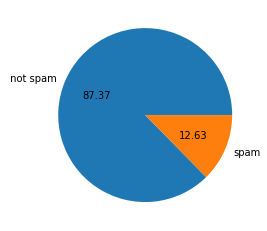

In [19]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

### there is imbalance in data

In [20]:
# no. of alphabets in the data
# no. of sentences in the data
# no. of words in the data

### *Now lets make 3 new columns in the data depicting the no. of characters,words and sentences*

In [21]:
#natural language tool kit
import nltk

In [22]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [24]:
#now find the length of each of the list to get the total number of words in each list
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
232,0,"Sorry battery died, yeah I'm here",33,8
1538,0,Midnight at the earliest,24,4
258,1,We tried to contact you re your reply to our o...,154,31
486,1,FREE MESSAGE Activate your 500 FREE Text Messa...,146,24
1064,0,"That's fine, I'll bitch at you about it later ...",50,13


In [25]:
#finding number of sentences
df['num_sentences']=df['message'].apply(lambda x: nltk.sent_tokenize(x))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
290,0,Hey you told your name to gautham ah?,37,9,[Hey you told your name to gautham ah?]
3609,0,"Call me. I m unable to cal. Lets meet bhaskar,...",55,15,"[Call me., I m unable to cal., Lets meet bhask..."
1275,0,Wot u up 2 u weirdo?,20,7,[Wot u up 2 u weirdo?]
4901,1,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,134,26,[* FREE* POLYPHONIC RINGTONE Text SUPER to 871...
3195,0,"I av a new number, . Wil u only use this one,ta.",49,16,"[I av a new number, ., Wil u only use this on..."


In [26]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
4679,0,"That's cool he'll be here all night, lemme kno...",66,17,1
3211,0,We got a divorce. Lol. She.s here,33,9,3
574,0,Nope i waiting in sch 4 daddy...,33,8,1
3858,1,Win the newest åÒHarry Potter and the Order of...,139,30,1
2547,1,"Text82228>> Get more ringtones, logos and game...",101,18,2


In [27]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


### For 'ham' messages

In [28]:
# lets check describe() for both ham and spam individually
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


### For 'spam' messages

In [29]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000



#### we can clearly see the spam messages are quite longer than the ham messages

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

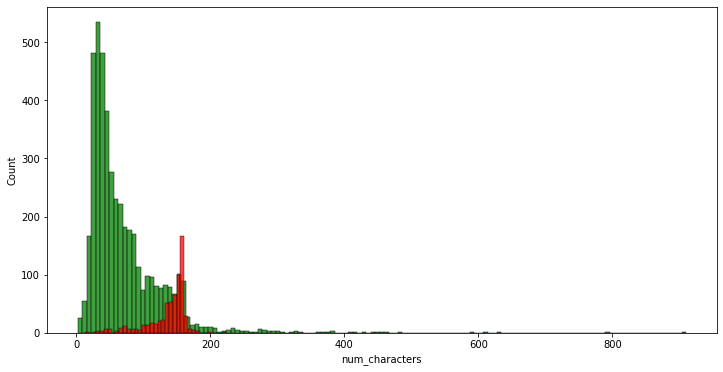

In [30]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

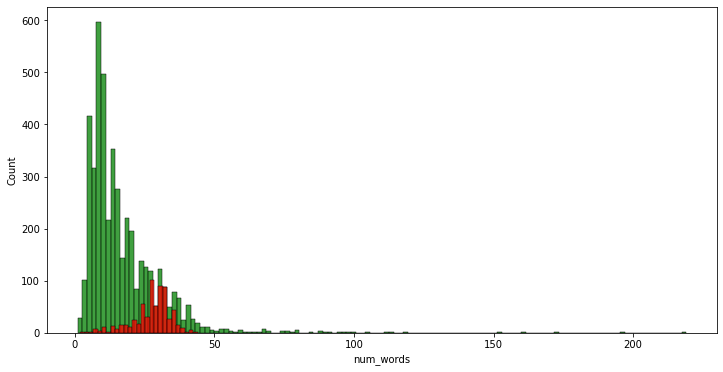

In [31]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')